In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# LOAD THE DATA

In [47]:
pride_df = pd.read_csv("/kaggle/input/pride-index/pride_index.csv")
pride_df.head()

,campus_name,campus_location,rating,students,community_type
0,"University of Maryland, College Park","College Park, MD",5.0,37952,large urban city
1,University of Michigan-Dearborn,"Dearborn, MI",3.0,9000,medium city
2,SUNY Westchester Community College,"Valhalla, NY",4.0,13000,very small town
3,University at Buffalo,"Buffalo, NY",3.5,29850,medium city
4,Slippery Rock University,"Slippery Rock, PA",4.0,8500,rural community


In [48]:
pride_df.describe()

,rating,students
count,238.000000,238.000000
mean,3.983193,12102.163866
std,0.816323,11870.241312
min,1.500000,125.000000
25%,3.500000,2397.000000
50%,4.000000,7929.500000
75%,4.500000,16867.750000
max,5.000000,50000.000000


## Any missing values ??

In [49]:
pride_df.isna().sum()
pride_df.isnull().sum()

campus_name        0
campus_location    0
rating             0
students           0
community_type     0
dtype: int64

# 1.What is the distribution of inclusivity ratings among campuses? 

## STATISTICAL SUMMARY

In [50]:
# Statistical summary
stat_summary = pride_df['rating'].describe()
print("Statistical Summary:")
print(stat_summary)


Statistical Summary:
count    238.000000
mean       3.983193
std        0.816323
min        1.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64


The statistical summary provides a detailed view of the inclusivity ratings across 238 campuses. Here's what we can infer from the data:

### General Level of Inclusivity

1. **Average Inclusivity**:
   - The mean rating is approximately 3.98, which is close to 4. This indicates that, on average, campuses have a relatively high level of inclusivity.

2. **Variation in Ratings**:
   - The standard deviation (std) is 0.82, suggesting that there is some variability in the inclusivity ratings among different campuses. While most campuses hover around the mean, there are some that deviate significantly.

3. **Range of Ratings**:
   - The ratings range from a minimum of 1.5 to a maximum of 5. This wide range indicates that while some campuses are very inclusive, others still have significant room for improvement.

4. **Quartiles**:
   - The 25th percentile (25%) is at 3.5, meaning that 25% of the campuses have inclusivity ratings below 3.5.
   - The median (50th percentile) is at 4.0, which is also close to the mean. This suggests that the middle value of the dataset aligns with the average inclusivity rating.
   - The 75th percentile (75%) is at 4.5, indicating that 75% of the campuses have ratings below 4.5, and only 25% have ratings of 4.5 or above.

### Interpretation

1. **Overall Positive Trend**:
   - The mean and median both being close to 4 indicates that the general level of inclusivity across campuses is relatively high. Most campuses are performing well in terms of inclusivity.

2. **Areas for Improvement**:
   - While the general trend is positive, the presence of campuses with ratings as low as 1.5 highlights that there are still some campuses that need significant improvements in their inclusivity practices.

3. **Distribution**:
   - The interquartile range (IQR) from 3.5 to 4.5 indicates that the majority of campuses (50% of them) have ratings within this range. This suggests a fairly tight clustering around the upper middle of the rating scale, with fewer campuses at the extremes.

4. **High Performers**:
   - A significant portion of campuses (those in the top quartile) have very high inclusivity ratings (4.5 or above), indicating the presence of best practices and exemplary inclusivity efforts that can serve as models for others.



# DISTRIBUTION PLOT

/tmp/ipykernel_33/2066457507.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pride_df['rating'], kde=True, color='red', bins=30)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


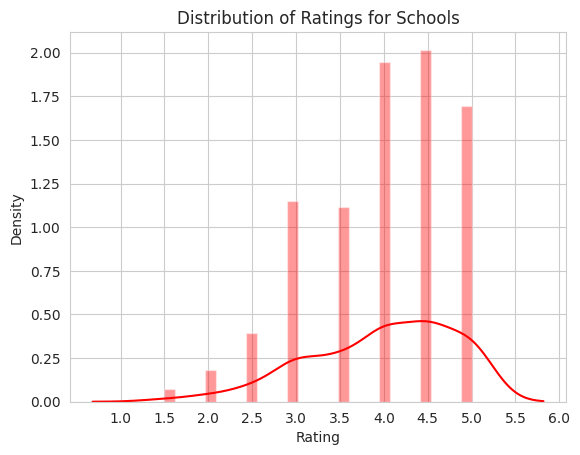

In [51]:
# import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt 
 

# Set the background style of the plot
sns.set_style('whitegrid')

# Plot the distribution of ratings
sns.distplot(pride_df['rating'], kde=True, color='red', bins=30)

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Distribution of Ratings for Schools')
plt.xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6])

# Show the plot
plt.show()

In [52]:
pride_df.community_type.unique()


array(['large urban city', 'medium city', 'very small town',
       'rural community', 'small town', 'small city'], dtype=object)

## Is there a correlation between the number of students at a campus and its inclusivity rating?

In [53]:
 # correaltions between numberof students and inclusivity rating columns
c = np.corrcoef(pride_df['rating'],pride_df['students'])
print('Correlations between inclusivity rating and number of students\n',c)

Correlations between inclusivity rating and number of students
 [[1.         0.39970693]
 [0.39970693 1.        ]]


In [54]:
import numpy as np
import pandas as pd

# Assuming pride_df is your DataFrame
# Calculate the 50th percentile
percentile_50 = 7929.5

# Split the data into two groups based on the 50th percentile
below_50th = pride_df[pride_df['students'] <= percentile_50]
above_50th = pride_df[pride_df['students'] > percentile_50]

# Calculate the correlation for each group
correlation_below_50th = np.corrcoef(below_50th['rating'], below_50th['students'])[0, 1]
correlation_above_50th = np.corrcoef(above_50th['rating'], above_50th['students'])[0, 1]

print('Correlation between inclusivity rating and number of students for campuses below 50th percentile AKA SMALL CAMPUS:')
print(correlation_below_50th)

print('Correlation between inclusivity rating and number of students for campuses above 50th percentile AKA BIG CAMPUS:')
print(correlation_above_50th)


Correlation between inclusivity rating and number of students for campuses below 50th percentile AKA SMALL CAMPUS:
-0.029151635302392995
Correlation between inclusivity rating and number of students for campuses above 50th percentile AKA BIG CAMPUS:
0.3202395857010407


The correlations calculated for campuses below and above the 50th percentile provide insights into the relationship between the number of students and inclusivity ratings:

### Interpretation of the Correlations

1. **Small Campuses (Below 50th Percentile)**:
   - Correlation: -0.029
   - Interpretation: The correlation between inclusivity rating and the number of students for smaller campuses is very close to zero and slightly negative. This suggests that there is no significant relationship between the number of students and inclusivity ratings for smaller campuses. In other words, the size of smaller campuses does not appear to have a meaningful impact on their inclusivity ratings.

2. **Large Campuses (Above 50th Percentile)**:
   - Correlation: 0.320
   - Interpretation: The correlation for larger campuses is positive and moderately strong. This indicates that, for larger campuses, as the number of students increases, the inclusivity rating also tends to increase. Larger campuses are more likely to have higher inclusivity ratings.

**Do larger campuses tend to have higher or lower ratings?**


- **Larger campuses (above the 50th percentile)** tend to have higher inclusivity ratings. This is evidenced by the positive correlation of 0.320, suggesting that as the number of students increases, so does the inclusivity rating.
- **Smaller campuses (below the 50th percentile)** show no significant relationship between the number of students and inclusivity ratings, as indicated by the near-zero correlation of -0.029.

### Strength of Correlation:

- **While the correlation is not very strong, it is still significant enough to suggest a trend. Larger campuses, in general, tend to have slightly higher inclusivity ratings compared to smaller campuses.**


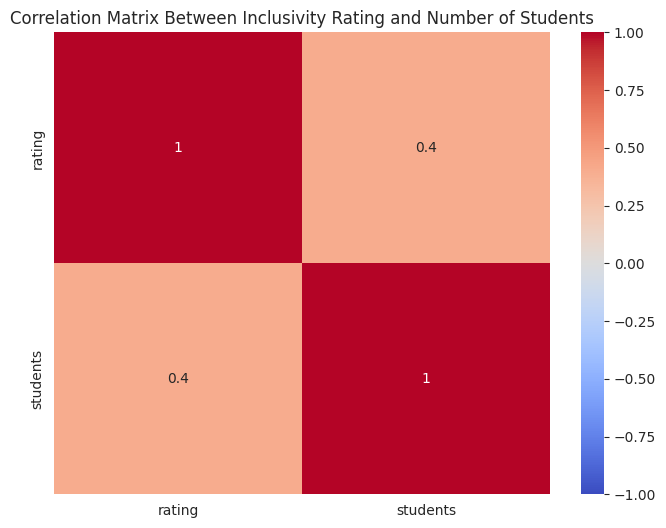

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix_df = pride_df[['rating', 'students']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Add labels and title
plt.title('Correlation Matrix Between Inclusivity Rating and Number of Students')
plt.show()


## How does the community type affect the inclusivity rating of a campus? 

In [56]:
community_rank = {
    'large_urban city': 6,
    'medium city': 5,
    'small city': 4,
    'small town': 3,
    'very small town': 2,
    'rural community': 1,
}
pride_df['community_rank'] = pride_df['community_type'].map(community_rank)


In [57]:
import pandas as pd

# Assuming your data is already loaded into a pandas DataFrame named pride_df

# Group by community type and calculate mean, standard deviation, and count of ratings
grouped_df = pride_df.groupby('community_type')['rating'].agg(['mean', 'std', 'count'])

# Sort the grouped DataFrame by 'mean' rating in ascending order
grouped_df = grouped_df.sort_values(by='mean', ascending=True)

# Print the grouped DataFrame
print("Mean, Standard Deviation, and Count of Ratings Grouped by Community Type (Sorted in Ascending Order):")
print(grouped_df)


Mean, Standard Deviation, and Count of Ratings Grouped by Community Type (Sorted in Ascending Order):
                      mean       std  count
community_type                             
very small town   3.541667  0.838243     12
rural community   3.566667  0.820859     15
small town        3.918919  0.750125     37
small city        4.013158  0.840530     76
medium city       4.074074  0.779498     54
large urban city  4.136364  0.816712     44


### Inclusivity Ratings:

Campuses in large urban cities and medium cities have higher average inclusivity ratings.
Campuses in rural communities and very small towns have lower average inclusivity ratings.
Variability:

The variability in ratings is relatively consistent across all community types, with standard deviations ranging from 0.750 to 0.841.
Sample Size:

The number of campuses varies across community types, with the highest number in small cities (76) and the lowest in very small towns (12).

/tmp/ipykernel_33/4027685911.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='community_type', y='rating', data=pride_df, palette='coolwarm')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = group

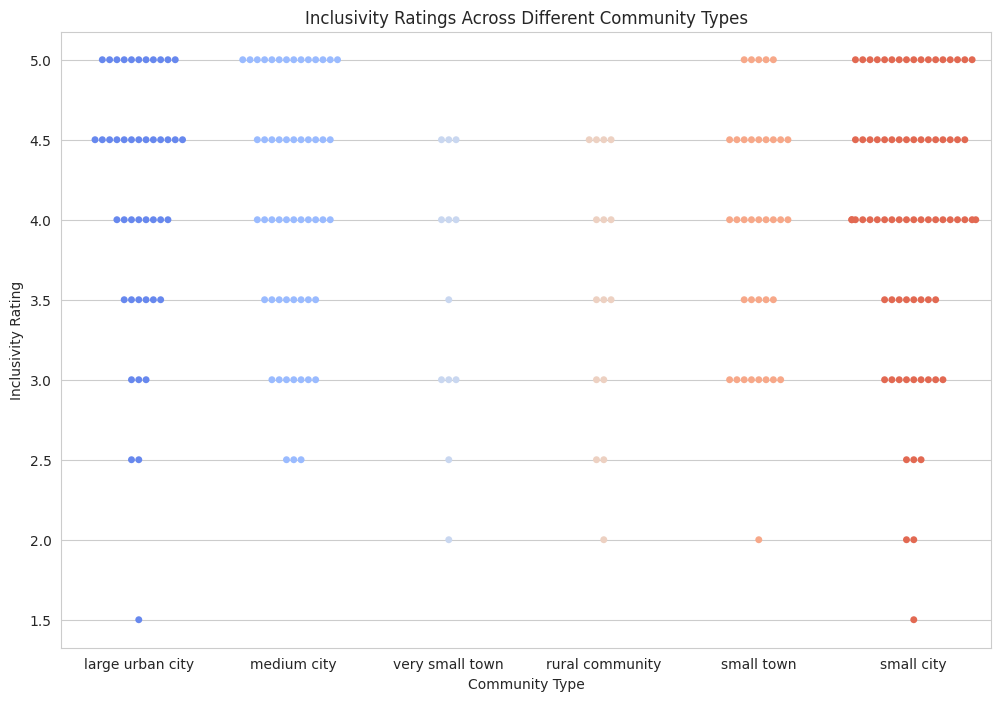

In [58]:
# Set the background style of the plot
sns.set_style('whitegrid')

# Create a swarm plot to visualize the distribution of ratings across community types
plt.figure(figsize=(12, 8))
sns.swarmplot(x='community_type', y='rating', data=pride_df, palette='coolwarm')

# Add labels and title
plt.xlabel('Community Type')
plt.ylabel('Inclusivity Rating')
plt.title('Inclusivity Ratings Across Different Community Types')

# Show the plot
plt.show()


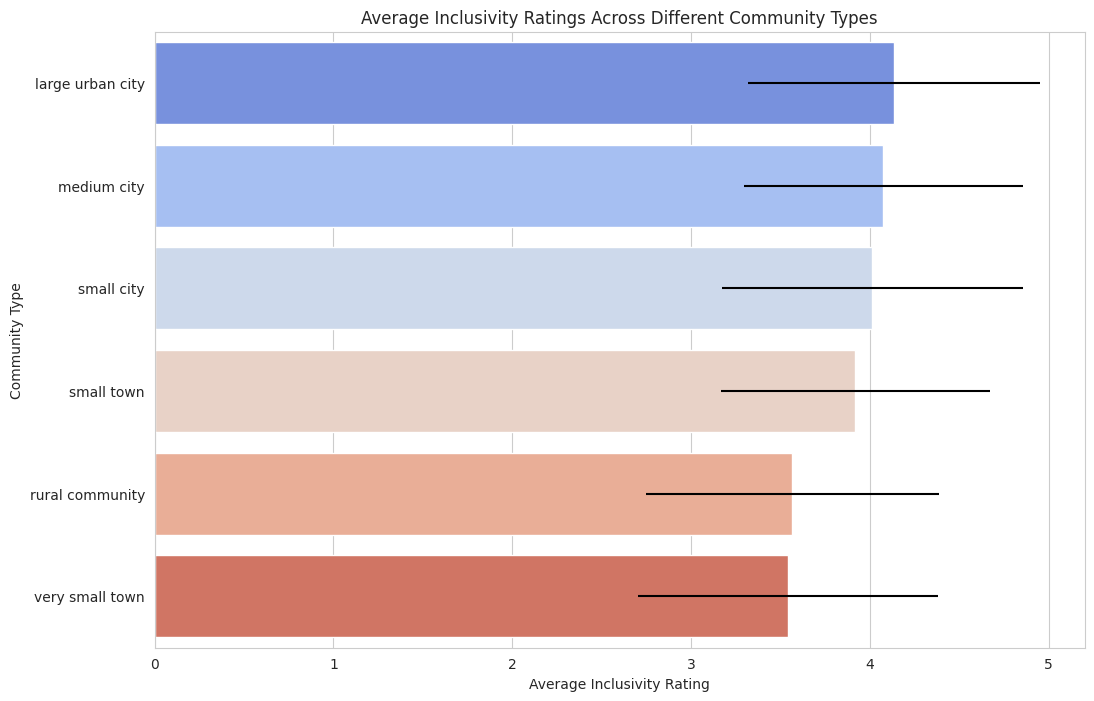

In [63]:
# Assuming pride_df is your DataFrame
# Calculate the average rating and standard deviation for each community type
community_type_means = pride_df.groupby('community_type')['rating'].mean().reset_index()
community_type_std = pride_df.groupby('community_type')['rating'].std().reset_index()

# Merge the means and standard deviations into a single DataFrame
community_type_summary = pd.merge(community_type_means, community_type_std, on='community_type', suffixes=('_mean', '_std'))

# Sort the DataFrame by the average rating in descending order
community_type_summary = community_type_summary.sort_values(by='rating_mean', ascending=False)

# Create a bar plot with error bars
plt.figure(figsize=(12, 8))
sns.barplot(x='rating_mean', y='community_type', data=community_type_summary, palette='coolwarm', errorbar=None, xerr=community_type_summary['rating_std'])

# Add labels and title
plt.xlabel('Average Inclusivity Rating')
plt.ylabel('Community Type')
plt.title('Average Inclusivity Ratings Across Different Community Types')

# Show the plot
plt.show()


## Which campuses are the outliers in terms of their inclusivity rating? Identify campuses that have significantly higher or lower inclusivity ratings compared to others in similar community types or with similar student populations. What characteristics or factors might explain these outliers?

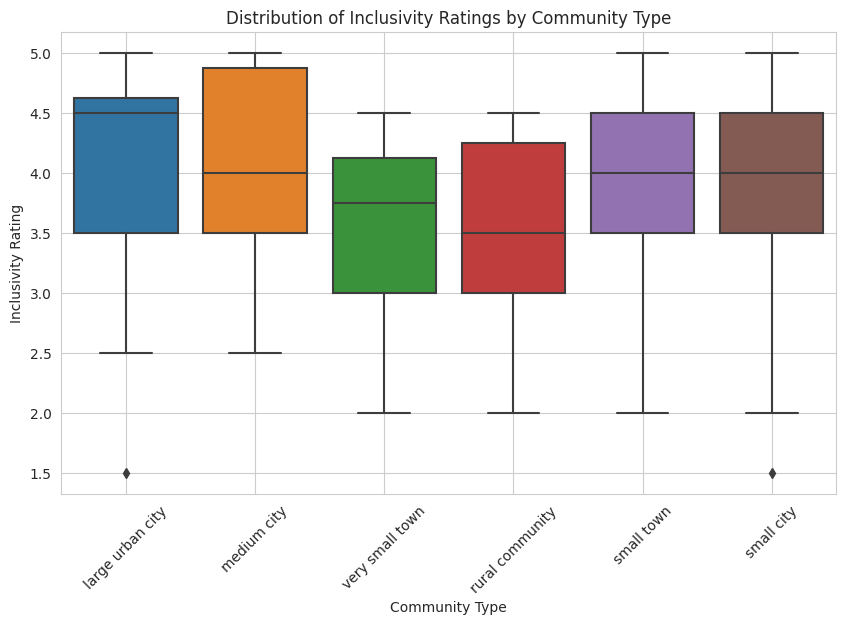

Outliers in Inclusivity Ratings:
                     campus_name    community_type  rating
155  Tidewater Community College  large urban city     1.5
185        Diablo Valley College        small city     1.5


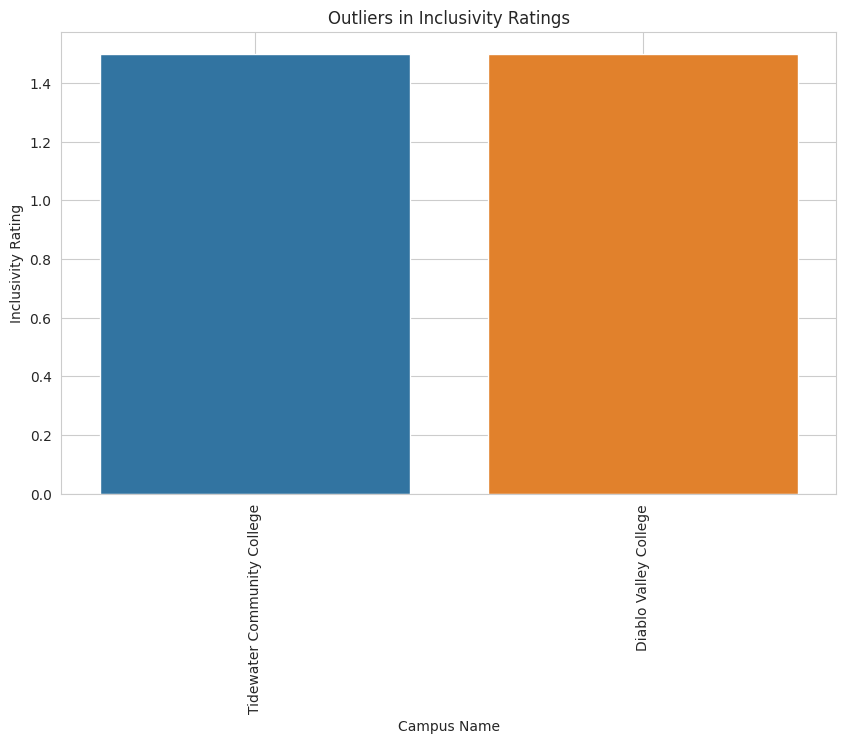

In [60]:
# Plotting a boxplot to visualize the distribution of inclusivity ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='community_type', y='rating', data=pride_df)
plt.title('Distribution of Inclusivity Ratings by Community Type')
plt.xlabel('Community Type')
plt.ylabel('Inclusivity Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Identifying outliers based on z-score or manual threshold
mean_rating = pride_df['rating'].mean()
std_dev_rating = pride_df['rating'].std()
threshold = 2.5  # Adjust this threshold based on your data distribution

# Calculate z-scores
pride_df['rating_z'] = (pride_df['rating'] - mean_rating) / std_dev_rating

# Identify outliers based on z-score or a custom threshold
outliers = pride_df[(pride_df['rating_z'] < -threshold) | (pride_df['rating_z'] > threshold)]

# Print the outliers
print("Outliers in Inclusivity Ratings:")
print(outliers[['campus_name', 'community_type', 'rating']])

# Plotting the outliers for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='campus_name', y='rating', data=outliers)
plt.title('Outliers in Inclusivity Ratings')
plt.xlabel('Campus Name')
plt.ylabel('Inclusivity Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [61]:
# Filter campuses with rating 1.5
low_rating_campuses = pride_df[pride_df['rating'] == 1.5]

# Extract information of the campuses with rating 1.5
campus_info = low_rating_campuses[['campus_name', 'community_type', 'rating', 'students']]

print("Campuses with a rating of 1.5:")
print(campus_info)

Campuses with a rating of 1.5:
                     campus_name    community_type  rating  students
155  Tidewater Community College  large urban city     1.5      7028
185        Diablo Valley College        small city     1.5      7854


## To understand why campuses like Tidewater Community College and Diablo Valley College might have a low inclusivity rating of 1.5 despite being located in large urban and small city communities respectively, we can consider several potential factors:

1. **Diversity Initiatives**: Evaluate if these campuses have specific programs, offices, or initiatives dedicated to LGBTQ+ inclusion and support. Lack of such resources or inadequate implementation could contribute to lower ratings.

2. **Campus Policies**: Review policies related to non-discrimination, gender identity protections, and accessibility of facilities. Strong policies that are inclusive and supportive can positively impact ratings.

3. **Community Engagement**: Assess the level of engagement with LGBTQ+ organizations and community groups both on and off campus. Active involvement can create a more inclusive environment.

4. **Student Support Services**: Availability of counseling services, LGBTQ+ student organizations, and peer support networks can significantly influence how supported LGBTQ+ students feel on campus.

5. **Training and Awareness**: Look into diversity training programs for faculty, staff, and students. Training that fosters understanding, respect, and awareness of LGBTQ+ issues can enhance inclusivity.

6. **Leadership and Commitment**: Leadership commitment to diversity and inclusion initiatives, as well as the presence of LGBTQ+ representation in leadership roles, can influence campus climate.


In [62]:
import pandas as pd

# Assuming your data is already loaded into a pandas DataFrame named pride_df

# Sort the DataFrame by 'rating' in descending order to find campuses with high inclusivity
high_inclusivity_campuses = pride_df.sort_values(by='rating', ascending=False)

# Display the top campuses with high inclusivity ratings
top_high_inclusivity_campuses = high_inclusivity_campuses.head(10)  # Adjust the number as needed
print("Top Campuses with High Inclusivity Ratings:")
print(top_high_inclusivity_campuses[['campus_name', 'campus_location','community_type', 'rating','students']])

# Sort the DataFrame by 'rating' in ascending order to find campuses with low inclusivity
low_inclusivity_campuses = pride_df.sort_values(by='rating', ascending=True)

# Display the top campuses with low inclusivity ratings
top_low_inclusivity_campuses = low_inclusivity_campuses.head(10)  # Adjust the number as needed
print("\nTop Campuses with Low Inclusivity Ratings:")
print(top_low_inclusivity_campuses[['campus_name','campus_location', 'community_type', 'rating', 'students']])


Top Campuses with High Inclusivity Ratings:
                              campus_name       campus_location  \
0    University of Maryland, College Park      College Park, MD   
126                    Adelphi University       Garden City, NY   
128        University of Illinois Chicago           Chicago, IL   
32                Kansas State University         Manhattan, KS   
71                     Macalester College        Saint Paul, MN   
36                          Union College       Schenectady, NY   
97    University of Wisconsin - Green Bay         Green Bay, WI   
95                       Guilford College        Greensboro, NC   
41             Montclair State University         Montclair, NJ   
93           Northern Kentucky University  Highland Heights, KY   

       community_type  rating  students  
0    large urban city     5.0     37952  
126        small town     5.0      7859  
128  large urban city     5.0     30539  
32         small city     5.0     20000  
71   lar

# Common Characteristics of High Inclusivity Campuses
## Community Type:
### High inclusivity ratings are found in a variety of community types, including large urban cities (University of Maryland, College Park; University of Illinois Chicago; Macalester College), small cities (Kansas State University; Union College; Montclair State University), and small towns (Adelphi University).

## Campus Size:
### These campuses have a range of student populations, from small colleges like Macalester College (2,094 students) to large universities like the University of Illinois Chicago (30,539 students).

## Diverse Locations:
### Campuses with high inclusivity ratings are spread across different regions of the United States, indicating that high inclusivity can be achieved regardless of geographic location.

# Recommendations for Campuses with Lower Ratings

## Promote Inclusive Policies and Practices:
### Develop and enforce policies that explicitly prohibit discrimination based on sexual orientation and gender identity.
### Provide regular training for staff and faculty on inclusivity, diversity, and LGBTQ+ issues.
### Create safe spaces and support groups for LGBTQ+ students to foster a sense of community and belonging.

## Increase Visibility and Representation:
### Encourage the formation of LGBTQ+ student organizations and support their activities and events.
### Ensure that LGBTQ+ history and issues are included in the curriculum and campus events to increase awareness and education.

## Foster an Inclusive Campus Culture:
### Promote allyship programs where students and staff can actively support LGBTQ+ peers.
### Celebrate LGBTQ+ events and observances such as Pride Month.

## Leverage Data and Feedback:
### Conduct regular surveys to assess the campus climate regarding inclusivity and use the feedback to make informed changes.
### Implement a system for students to report incidents of discrimination or harassment confidentially and ensure timely and effective responses.**